In [1]:
import pandas as pd
reg_data = pd.read_csv('/home/ugrads/a/aa_ron_su/BoXHED_Fuse/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/till_end_mimic_iv_extra_features_train_NOTE_TARGET_-1_rad_recent.csv')

<Axes: >

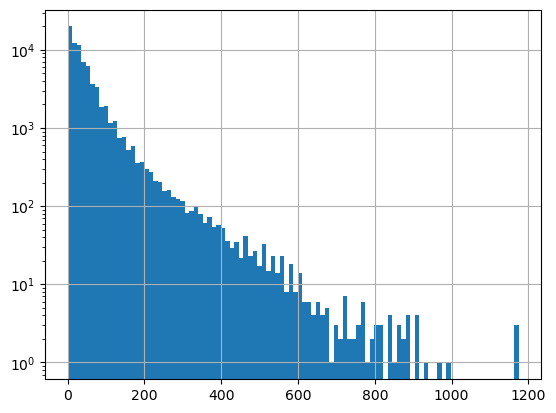

In [6]:
reg_data.time_until_event.hist(bins=100, log=True)

In [9]:
import pandas as pd
import torch
from helpers import convert_to_list, explode_train_target
train_target_path = f'/home/ugrads/a/aa_ron_su/BoXHED_Fuse/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/till_end_mimic_iv_extra_features_train_NOTE_TARGET_2_rad_all.csv'
train_target = pd.read_csv(train_target_path, converters = {'NOTE_ID_SEQ': convert_to_list})
target = 'delta_in_2_days' # FIXME
train_target = train_target.rename(columns = {target:'label'})

train_embs_path = f'/home/ugrads/a/aa_ron_su/BoXHED_Fuse/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/embs{"/testing"}/{"Clinical-T5-Base"}_{"rad"}_{"all"}_out/from_epoch1/10/train_embs.pt'
train_embs = torch.load(train_embs_path)

In [10]:
train_embs.shape

torch.Size([183, 64])

In [23]:
def merge_embs_to_seq(train_embs, train_target) -> List:
    '''
    given an unordered list of note sequences, merge with train_target df
    '''
    train_embs_seq = []
    for seq in train_target.NOTE_ID_SEQ:
        seq_df = pd.DataFrame(seq)
        
    return [] # FIXME

IndentationError: expected an indented block after 'for' statement on line 6 (2453732919.py, line 8)

In [14]:
train_target_exploded = explode_train_target(train_target)

In [40]:
len(train_target)

25

In [44]:
train_target_exploded.NOTE_ID.nunique()


183

In [45]:
train_embs.shape

torch.Size([33, 64])

In [37]:
train_target_exploded.NOTE_ID.nunique()

183

In [31]:
seq_df = pd.DataFrame(train_target.NOTE_ID_SEQ.iloc[0], columns=['NOTE_ID'])
seq_df
seq_df.merge(train_target_exploded, how='left', on='NOTE_ID')


,NOTE_ID,ICUSTAY_ID,label
0,10003019-RR-16,30676350.0,0
1,10003019-RR-17,30676350.0,0
2,10003019-RR-19,30676350.0,0
3,10003019-RR-20,30676350.0,0
4,10003019-RR-21,30676350.0,0
5,10003019-RR-22,30676350.0,0
6,10003019-RR-23,30676350.0,0
7,10003019-RR-24,30676350.0,0
8,10003019-RR-25,30676350.0,0
9,10003019-RR-26,30676350.0,0


In [7]:
import torch
from datasets import Dataset

tokens1 = Dataset.load_from_disk('/home/ugrads/a/aa_ron_su/BoXHED_Fuse/model_outputs/Clinical-T5-Base_rad_all_out/6/data_cache/tokenized_train_data')
tokens2 = Dataset.load_from_disk('/home/ugrads/a/aa_ron_su/BoXHED_Fuse/model_outputs/Clinical-T5-Base_rad_out/3/data_cache/tokenized_train_data')

In [37]:
def get_tokens_view(tokens_ds):
    input_id_lengths = [len(i) for i in tokens_ds['input_ids']]
    label_sum = sum(tokens_ds['label'])
    return input_id_lengths, label_sum
iil1, ls1 = get_tokens_view(tokens1)
iil2, ls2 = get_tokens_view(tokens2)


In [39]:
[l for l in iil1 if l != 512],  [l for l in iil2 if l != 512]

([], [])

In [40]:
ls1, ls2

(11740, 10139)

In [19]:
len(tokens1['input_ids'][0])

512

In [2]:
import pandas as pd
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Display full column width
from helpers import convert_to_list
train_og = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/till_end_mimic_iv_extra_features_train.csv'
train_og=pd.read_csv(train_og)

train_path = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/till_end_mimic_iv_extra_features_train_NOTE_rad_all.csv'
test_path = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/till_end_mimic_iv_extra_features_test_NOTE_rad_all.csv'

train_target_path = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/till_end_mimic_iv_extra_features_train_NOTE_TARGET_2_rad_all.csv'
# train = pd.read_csv(train_path)
# test = pd.read_csv(test_path)

train_target = pd.read_csv(train_target_path)

In [16]:
train_og['epoch_len'] = train_og['t_end'] - train_og['t_start']

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train_og' is your DataFrame
data = train_og['epoch_len']

# Apply a logarithmic transformation to the data
log_data = [d for d in data if d < 1]

# Plot the histogram with a logarithmic x-axis
plt.hist(log_data, bins=100, color='blue')
# plt.xscale('log')  # Set x-axis to be logarithmic

plt.title('Logarithmic Histogram of epoch_len')
plt.xlabel('Log(Epoch Length)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


In [68]:
train_target

,ICUSTAY_ID,NOTE_ID,delta_in_2_days,NOTE_ID_SEQ
0,30676350.0,10003019-RR-66,0,"['10003019-RR-16', '10003019-RR-17', '10003019-RR-19', '10003019-RR-20', '10003019-RR-21', '10003019-RR-22', '10003019-RR-23', '10003019-RR-24', '10003019-RR-25', '10003019-RR-26', '10003019-RR-27', '10003019-RR-28', '10003019-RR-29', '10003019-RR-30', '10003019-RR-31', '10003019-RR-32', '10003019-RR-33', '10003019-RR-34', '10003019-RR-35', '10003019-RR-36', '10003019-RR-37', '10003019-RR-38', '10003019-RR-39', '10003019-RR-40', '10003019-RR-42', '10003019-RR-43', '10003019-RR-45', '10003019-RR-46', '10003019-RR-47', '10003019-RR-48', '10003019-RR-49', '10003019-RR-50', '10003019-RR-52', '10003019-RR-53', '10003019-RR-54', '10003019-RR-55', '10003019-RR-56', '10003019-RR-57', '10003019-RR-58', '10003019-RR-59', '10003019-RR-60', '10003019-RR-61', '10003019-RR-62', '10003019-RR-65', '10003019-RR-66']"
1,31090461.0,10002155-RR-52,0,"['10002155-RR-22', '10002155-RR-23', '10002155-RR-24', '10002155-RR-25', '10002155-RR-27', '10002155-RR-26', '10002155-RR-29', '10002155-RR-31', '10002155-RR-32', '10002155-RR-33', '10002155-RR-34', '10002155-RR-35', '10002155-RR-37', '10002155-RR-38', '10002155-AR-40', '10002155-RR-40', '10002155-RR-41', '10002155-RR-39', '10002155-RR-42', '10002155-RR-43', '10002155-RR-45', '10002155-RR-47', '10002155-RR-48', '10002155-RR-49', '10002155-RR-50', '10002155-RR-52']"
2,31205490.0,10001725-RR-12,0,"['10001725-RR-10', '10001725-RR-11', '10001725-RR-12']"
3,32128372.0,10003400-RR-66,0,"['10003400-RR-49', '10003400-RR-50', '10003400-RR-51', '10003400-RR-53', '10003400-RR-55', '10003400-RR-56', '10003400-RR-57', '10003400-RR-58', '10003400-RR-59', '10003400-RR-60', '10003400-RR-61', '10003400-RR-63', '10003400-RR-64', '10003400-RR-65', '10003400-RR-66']"
4,32128372.0,10003400-RR-67,0,"['10003400-RR-49', '10003400-RR-50', '10003400-RR-51', '10003400-RR-53', '10003400-RR-55', '10003400-RR-56', '10003400-RR-57', '10003400-RR-58', '10003400-RR-59', '10003400-RR-60', '10003400-RR-61', '10003400-RR-63', '10003400-RR-64', '10003400-RR-65', '10003400-RR-66', '10003400-RR-67']"
5,32128372.0,10003400-RR-68,0,"['10003400-RR-49', '10003400-RR-50', '10003400-RR-51', '10003400-RR-53', '10003400-RR-55', '10003400-RR-56', '10003400-RR-57', '10003400-RR-58', '10003400-RR-59', '10003400-RR-60', '10003400-RR-61', '10003400-RR-63', '10003400-RR-64', '10003400-RR-65', '10003400-RR-66', '10003400-RR-67', '10003400-RR-68']"
6,33685454.0,10002155-RR-29,0,"['10002155-RR-22', '10002155-RR-23', '10002155-RR-24', '10002155-RR-25', '10002155-RR-27', '10002155-RR-26', '10002155-RR-29']"
7,33685454.0,10002155-RR-31,0,"['10002155-RR-22', '10002155-RR-23', '10002155-RR-24', '10002155-RR-25', '10002155-RR-27', '10002155-RR-26', '10002155-RR-29', '10002155-RR-31']"
8,33685454.0,10002155-RR-32,0,"['10002155-RR-22', '10002155-RR-23', '10002155-RR-24', '10002155-RR-25', '10002155-RR-27', '10002155-RR-26', '10002155-RR-29', '10002155-RR-31', '10002155-RR-32']"
9,33685454.0,10002155-RR-33,0,"['10002155-RR-22', '10002155-RR-23', '10002155-RR-24', '10002155-RR-25', '10002155-RR-27', '10002155-RR-26', '10002155-RR-29', '10002155-RR-31', '10002155-RR-32', '10002155-RR-33']"


In [ ]:
train

In [26]:
train['NOTE_ID_SEQ'] = train['NOTE_ID']

In [16]:
train.NOTE_ID = train.NOTE_ID_SEQ.apply(lambda x: x[-1])

In [29]:
import ast
def convert_to_list(s):
    return ast.literal_eval(s)

In [31]:
train.NOTE_ID = train.NOTE_ID.transform(convert_to_list)

In [35]:
train['NOTE_ID'] = train['NOTE_ID'].apply(lambda x: x[-1] if x != [] else None)

In [49]:
test.NOTE_ID_SEQ = test.NOTE_ID
test.NOTE_ID = test.NOTE_ID.transform(convert_to_list)
test['NOTE_ID'] = test['NOTE_ID'].apply(lambda x: x[-1] if x != [] else None)

In [58]:
test['NOTE_ID_SEQ'] = test.NOTE_ID_SEQ

In [60]:
train = train[['ICUSTAY_ID', 'SUBJECT_ID', 't_start', 't_end','INTIME','t_start_DT','NOTE_ID','NOTE_ID_SEQ','time_since_note','delta']]
test = test[['ICUSTAY_ID', 'SUBJECT_ID', 't_start', 't_end', 'Y','INTIME','t_start_DT','NOTE_ID','NOTE_ID_SEQ','time_since_note','delta']]

In [ ]:
train

In [ ]:
test

In [63]:
train.to_csv(train_path)

In [64]:
test.to_csv(test_path)

In [8]:
train_og.rename(columns={'Icustay':'ICUSTAY_ID', 'subject':'SUBJECT_ID'}, inplace=True)

In [ ]:
train_og

In [ ]:
train.columns.tolist()

In [ ]:
view= train[['subject', 'Icustay', 'delta']]
view1 = view.groupby('subject').apply(lambda x : sum(x.delta))
view2 = view.groupby('Icustay').apply(lambda x : sum(x.delta))

In [ ]:
view1.sort_values(ascending=False)

In [ ]:
view2.sort_values(ascending=False).head(100)

In [ ]:
len(view1), view1.sum()

In [ ]:
len(view2), view2.sum()

In [56]:
import pandas as pd
from helpers import convert_to_list


train_note = pd.read_csv('/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/testing/till_end_mimic_iv_extra_features_train_NOTE_rad_all.csv')
train_path_OLD = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/compare/till_end_mimic_iv_extra_features_train_NOTE_TARGET_2_rad_all.csv'
train_target_OLD = pd.read_csv(train_path_OLD, converters = {'NOTE_ID': convert_to_list})

train_path = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/till_end_mimic_iv_extra_features_train_NOTE_TARGET_2_rad_all.csv'
train_path2 = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/till_end_mimic_iv_extra_features_train_NOTE_TARGET_2_rad_recent.csv'
train_target = pd.read_csv(train_path, converters = {'NOTE_ID_SEQ': convert_to_list})
train_target2 = pd.read_csv(train_path2)

test_path = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/till_end_mimic_iv_extra_features_test_NOTE_TARGET_2_rad_all.csv'
test_path2 = '/home/ugrads/a/aa_ron_su/BoXHED_Fuse/JSS_SUBMISSION_NEW/data/targets/testing/till_end_mimic_iv_extra_features_test_NOTE_TARGET_2_rad_recent.csv'
test_target = pd.read_csv(test_path, converters = {'NOTE_ID_SEQ': convert_to_list})
test_target2 = pd.read_csv(test_path2)

In [65]:
train_target.NOTE_ID.isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
Name: NOTE_ID, dtype: bool

In [67]:
train_target.NOTE_ID_SEQ.apply(lambda x : len(x) == 0)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
Name: NOTE_ID_SEQ, dtype: bool

In [51]:
len(train_target_OLD.ICUSTAY_ID.unique())

14

In [52]:
len(train_target.ICUSTAY_ID.unique())

14

In [55]:
pd.isna(train_target.NOTE_ID_SEQ)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: NOTE_ID_SEQ, dtype: bool

In [33]:
train_target

,ICUSTAY_ID,NOTE_ID,delta_in_2_days,NOTE_ID_SEQ
0,30676350.0,10003019-RR-66,0,"[10003019-RR-16, 10003019-RR-17, 10003019-RR-1..."
1,31090461.0,10002155-RR-52,0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2..."
2,31205490.0,10001725-RR-12,0,"[10001725-RR-10, 10001725-RR-11, 10001725-RR-12]"
3,32128372.0,10003400-RR-66,0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5..."
4,32128372.0,10003400-RR-67,0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5..."
5,32128372.0,10003400-RR-68,0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5..."
6,33685454.0,10002155-RR-29,0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2..."
7,33685454.0,10002155-RR-31,0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2..."
8,33685454.0,10002155-RR-32,0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2..."
9,33685454.0,10002155-RR-33,0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2..."


In [12]:
train_target

,ICUSTAY_ID,NOTE_ID,delta_in_2_days
0,30676350.0,"[10003019-RR-16, 10003019-RR-17, 10003019-RR-1...",0
1,31090461.0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2...",0
2,31090461.0,"[10002155-RR-54, 10002155-RR-22, 10002155-RR-2...",0
3,31090461.0,"[10002155-RR-54, 10002155-RR-53, 10002155-RR-2...",0
4,31090461.0,"[10002155-RR-54, 10002155-RR-53, 10002155-RR-5...",0
5,31090461.0,"[10002155-RR-54, 10002155-RR-53, 10002155-RR-5...",0
6,31205490.0,"[10001725-RR-10, 10001725-RR-11, 10001725-RR-12]",0
7,32128372.0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5...",0
8,32128372.0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5...",0
9,32128372.0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5...",0


In [5]:
train_target.explode('NOTE_ID').drop_duplicates(subset='NOTE_ID')

,ICUSTAY_ID,NOTE_ID,delta_in_2_days
0,30676350.0,10003019-RR-16,0
0,30676350.0,10003019-RR-17,0
0,30676350.0,10003019-RR-19,0
0,30676350.0,10003019-RR-20,0
0,30676350.0,10003019-RR-21,0
...,...,...,...
30,39765666.0,10000980-RR-57,0
30,39765666.0,10000980-RR-58,0
30,39765666.0,10000980-RR-60,0
30,39765666.0,10000980-RR-61,0


In [9]:
len(train_target)

31

In [8]:
len(train_target2)

25

In [6]:
train_target

,ICUSTAY_ID,NOTE_ID,delta_in_2_days
0,30676350.0,"[10003019-RR-16, 10003019-RR-17, 10003019-RR-1...",0
1,31090461.0,"[10002155-RR-22, 10002155-RR-23, 10002155-RR-2...",0
2,31090461.0,"[10002155-RR-54, 10002155-RR-22, 10002155-RR-2...",0
3,31090461.0,"[10002155-RR-54, 10002155-RR-53, 10002155-RR-2...",0
4,31090461.0,"[10002155-RR-54, 10002155-RR-53, 10002155-RR-5...",0
5,31090461.0,"[10002155-RR-54, 10002155-RR-53, 10002155-RR-5...",0
6,31205490.0,"[10001725-RR-10, 10001725-RR-11, 10001725-RR-12]",0
7,32128372.0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5...",0
8,32128372.0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5...",0
9,32128372.0,"[10003400-RR-49, 10003400-RR-50, 10003400-RR-5...",0


In [ ]:
len(train_target2),len(train_target)

In [ ]:
len(test_target2),len(test_target)

In [ ]:
test_target[test_target['delta_in_2_days'] == 1]

In [ ]:
test_target2[test_target2['ICUSTAY_ID'] == 30600691]

In [ ]:
test_target2[test_target2['delta_in_2_days'] == 1]

In [ ]:
train_target[train_target['delta_in_2_days'] == 1].NOTE_ID.iloc[1]

In [ ]:
train_target2[train_target2['delta_in_2_days'] == 1].NOTE_ID

In [ ]:
exploded = train_target.explode('NOTE_ID')

In [ ]:
exploded

In [ ]:
train_note.NOTE_ID